# Simple iteration for systems of linear equations

First, generate a random diagonally dominant matrix, for testing.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
rndm = np.random.RandomState(1234)

n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([15]*n)
b = rndm.uniform(size=n)

# I.  Jacobi iteration

Given

$$
A x = b
$$

separate the diagonal part $D$,

$$ A = D + (A - D) $$

and write

$$
x = D^{-1} (D - A) x + D^{-1} b\;.
$$

Then iterate

$$
x_{n + 1} = B x_{n} + c\;,
$$

where 

$$
B = D^{-1} (A - D) \qquad \text{and} \qquad c = D^{-1} b
$$


Let's construct the matrix and the r.h.s. for the Jacobi iteration

In [2]:
diag_1d = np.diag(A)

B = -A.copy()
np.fill_diagonal(B, 0)

D = np.diag(diag_1d)
invD = np.diag(1./diag_1d)
BB = invD @ B 
c = invD @ b

In [3]:
# sanity checks
from numpy.testing import assert_allclose

assert_allclose(-B + D, A)


# xx is a "ground truth" solution, compute it using a direct method
xx = np.linalg.solve(A, b)

np.testing.assert_allclose(A@xx, b)
np.testing.assert_allclose(D@xx, B@xx + b)
np.testing.assert_allclose(xx, BB@xx + c)

Check that $\| B\| \leqslant 1$:

In [4]:
np.linalg.norm(BB)

0.36436161983015336

### Do the Jacobi iteration

In [5]:
n_iter = 50

x0 = np.ones(n)
x = x0
for _ in range(n_iter):
    x = BB @ x + c

In [6]:
# Check the result:

A @ x - b

array([ 0.00000000e+00,  2.22044605e-16,  0.00000000e+00, -1.11022302e-16,
        0.00000000e+00,  0.00000000e+00, -2.08166817e-17,  0.00000000e+00,
        0.00000000e+00,  2.22044605e-16])

### Task I.1

Collect the proof-of-concept above into a single function implementing the Jacobi iteration. This function should receive the r.h.s. matrix $A$, the l.h.s. vector `b`, and the number of iterations to perform.


The matrix $A$ in the illustration above is strongly diagonally dominant, by construction. 
What happens if the diagonal matrix elements of $A$ are made smaller? Check the convergence of the Jacobi iteration, and check the value of the norm of $B$.

(20% of the total grade)


In [61]:
def jac(A, b, maxiter = 1000, tol = 1e-15):#зачем думать, когда можно просто копипастить куски кода
    diag_1d = np.diag(A)

    B = -A.copy()
    np.fill_diagonal(B, 0)

    D = np.diag(diag_1d)
    invD = np.diag(1./diag_1d)
    BB = invD @ B 
    c = invD @ b
    x0 = np.ones(n)
    x = x0
    for _ in range(maxiter):
        x = BB @ x + c
    return x, np.linalg.norm(BB)

In [62]:
A@jac(A, b)[0] - b

array([5.55111512e-17, 1.11022302e-16, 1.11022302e-16, 0.00000000e+00,
       1.11022302e-16, 0.00000000e+00, 0.00000000e+00, 1.11022302e-16,
       0.00000000e+00, 0.00000000e+00])

давайте теперь проверять

In [63]:
rndm = np.random.RandomState(2385) #рандомно стучу по кравиатуре

n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([15]*n)
b = rndm.uniform(size=n)
x, norm = jac(A, b)
print(norm)
if np.linalg.norm(A@x - b) < 1e-10:
    print('All right')

0.35888383336103874
All right


In [64]:
rndm = np.random.RandomState(3622) #рандомно стучу по кравиатуре

n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([10]*n)
b = rndm.uniform(size=n)
x, norm = jac(A, b)
print(norm)

if np.linalg.norm(A@x - b) < 1e-10:
    print('All right')

0.5307592365660666
All right


In [65]:
rndm = np.random.RandomState(3622) #рандомно стучу по кравиатуре

n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([7]*n)
b = rndm.uniform(size=n)
x, norm = jac(A, b)
print(norm)

if np.linalg.norm(A@x - b) < 1e-10:
    print('All right')

0.7447329127470692
All right


In [66]:
rndm = np.random.RandomState(3463) #рандомно стучу по кравиатуре

n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([2]*n)
b = rndm.uniform(size=n)
x, norm = jac(A, b)
print(norm)
if np.linalg.norm(A@x - b) < 1e-10:
    print('All right')
else:
    print(A@x - b)

2.3292454385799966
[6.84897611e+297 7.17936268e+297 6.71312347e+297 5.47472534e+297
 5.04347027e+297 5.23674349e+297 6.19662149e+297 6.58892807e+297
 8.15295692e+297 5.95078692e+297]


как больно то. Давайте попробуем посмотреть на сходимость. На функане меня учили, что норма должна как-то по экспоненте расходится.

In [13]:
def upd_jac(A, b, num = 100):# модифицируем так, чтобы выдавала вектор норм промежуточных решений
    diag_1d = np.diag(A)

    B = -A.copy()
    np.fill_diagonal(B, 0)

    D = np.diag(diag_1d)
    invD = np.diag(1./diag_1d)
    BB = invD @ B 
    c = invD @ b
    x0 = np.ones(n)
    x = x0
    vec = []
    for _ in range(num):
        x = BB @ x + c
        vec.append(np.linalg.norm(x))
    return x, np.linalg.norm(BB), np.array(vec)

In [14]:
_, _, vec = upd_jac(A, b)

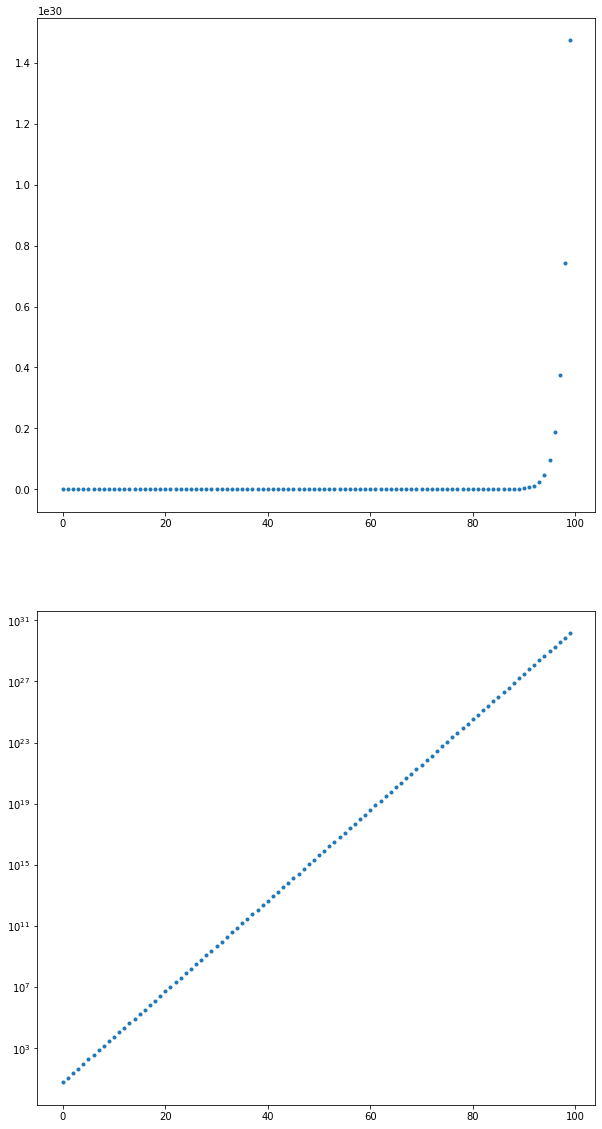

In [15]:
fig, ax = plt.subplots(nrows = 2, figsize = (10, 20))
ax[1].plot(vec, '.')
ax[1].set_yscale('log')
ax[0].plot(vec, '.')

В лог масштабе на прямую ложится, значит экспонента, все хорошо, так быть и должно  
Функан сила, так что понятно, что пока норма $B$ меньше 1 сходится будем, а когда больше нет.

# II. Seidel's iteration.

##### Task II.1

Implement the Seidel's iteration. 

Test it on a random matrix. Study the convergence of iterations, relate to the norm of the iteration matrix.

(30% of the total grade)

In [16]:
def siedel(A, b, maxiter = 100, tol = 1e-15):
    A = np.array(A)
    b = np.array(b)
    n = len(b)
    x = np.ones(n)
    count = 0
    D = np.diag(A)
    invD = np.diag(1./D)
    B = invD@(D - A)
    bb = np.linalg.norm(invD@np.tril(A - D)) + np.linalg.norm(invD@np.triu(A - D)) #другая оценка для сходимости
    for i in range(maxiter):
        count +=1
        for j in range(n):#тут мы построчно решаем уравнение просто
            x[j] = (b[j] - A[j, :]@x)/A[j,j] + x[j]
#             можно было зараее поделить все b на диагональные элементы, как это делал лектор выше, но зачем?
        if np.linalg.norm(A@x - b) < tol:
            break
    
    return x, np.linalg.norm(B), bb, count

In [17]:
rndm = np.random.RandomState(2465) #рандомно стучу по кравиатуре

n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([15]*n)
b = rndm.uniform(size=n)
x, norm, norm2, c = siedel(A, b)
print(norm,norm2, c)
if np.linalg.norm(A@x - b) < 1e-10:
    print('All right')

9.202241428653984 13.013934573516877 14
All right


In [18]:
rndm = np.random.RandomState(92345237) #рандомно стучу по кравиатуре

n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([50]*n)
b = rndm.uniform(size=n)
x, norm,norm2, c = siedel(A, b)
print(norm,norm2, c)
if np.linalg.norm(A@x - b) < 1e-10:
    print('All right')

9.395789468061034 13.287649641068775 10
All right


In [19]:
rndm = np.random.RandomState(902752) #рандомно стучу по кравиатуре

n = 5
A = rndm.uniform(size=(n, n)) + np.diagflat([7]*n)
b = rndm.uniform(size=n)
x, norm,norm2, c = siedel(A, b)
print(norm,norm2, c)
if np.linalg.norm(A@x - b) < 1e-10:
    print('All right')

4.180984166900975 5.912331620647917 13
All right


In [20]:
rndm = np.random.RandomState(3249875) #рандомно стучу по кравиатуре

n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([3]*n)
b = rndm.uniform(size=n)
x, norm,norm2, c = siedel(A, b)
print(norm,norm2, c)
if np.linalg.norm(A@x - b) < 1e-10:
    print('All right')

8.328937235172491 11.76881974891526 37
All right


Безумие какое-то, почему оно сходится? Не должно же

# III. Minimum residual scheme

### Task III.1

Implement the $\textit{minimum residual}$ scheme: an explicit non-stationary method, where at each step you select the iteration parameter $\tau_n$ to minimize the residual $\mathbf{r}_{n+1}$ given $\mathbf{r}_n$. Test it on a random matrix, study the convergence to the solution, in terms of the norm of the residual and the deviation from the ground truth solution (which you can obtain using a direct method). Study how the iteration parameter $\tau_n$ changes as iterations progress.

(50% of the grade)

In [32]:
def minres(A, b, maxiter = 100, tol = 1e-15):
    A = np.array(A)
    b = np.array(b)
    x = np.ones(n)
    count = 0
    tauar = []
    
    for i in range(maxiter):
        r = A@x - b
        ar = A@r
        tau = (r@ar)/np.linalg.norm(ar)**2
        x = x - tau*r
        count +=1
        tauar.append(tau)
        if np.linalg.norm(A@x - b) < tol:
            break
        
    return x, count, np.array(tauar)

In [33]:
rndm = np.random.RandomState(2384976) #рандомно стучу по кравиатуре

n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([15]*n)
b = rndm.uniform(size=n)
x, c, tauar = minres(A, b)
print(c)
if np.linalg.norm(A@x - b) < 1e-15:
    print('All right')

18
All right


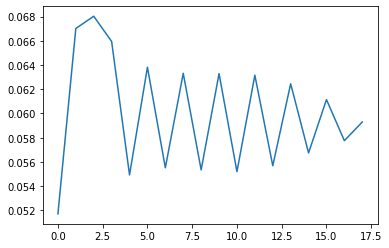

In [34]:
plt.plot(tauar)

In [35]:
rndm = np.random.RandomState(7889174) #рандомно стучу по кравиатуре

n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([3]*n)
b = rndm.uniform(size=n)
x,c, tauar2 = minres(A, b)
print(c)
if np.linalg.norm(A@x - b) < 1e-10:
    print('All right')

43
All right


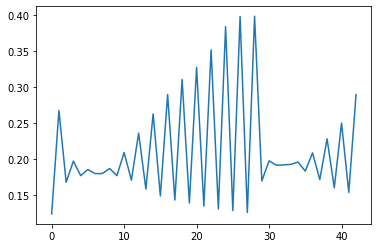

In [36]:
plt.plot(tauar2) 

In [37]:
rndm = np.random.RandomState(7889174) #рандомно стучу по кравиатуре

n = 20
A = rndm.uniform(size=(n, n)) + np.diagflat([3]*n)
b = rndm.uniform(size=n)
x,c, tauar3 = minres(A, b)
print(c)
if np.linalg.norm(A@x - b) < 1e-15:
    print('All right')

73
All right


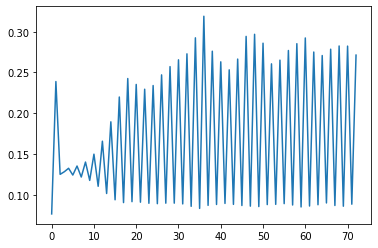

In [38]:
plt.plot(tauar3) 

давайте запустим что ли в очень длинные цикл и посмотрим на тау. Может что увидим. Для этого поставим нереалистичные требования на точность.

In [39]:
rndm = np.random.RandomState(827491) #рандомно стучу по кравиатуре

n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([3]*n)
b = rndm.uniform(size=n)
x,c, tauar4 = minres(A, b, maxiter=10000, tol = 1e-20)

In [40]:
A@x - b #ну он сошелся, просто из цикла не выходил из-за требования дикой точности

array([-2.77555756e-17,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.38777878e-17,  0.00000000e+00,  0.00000000e+00, -1.11022302e-16,
        0.00000000e+00,  0.00000000e+00])

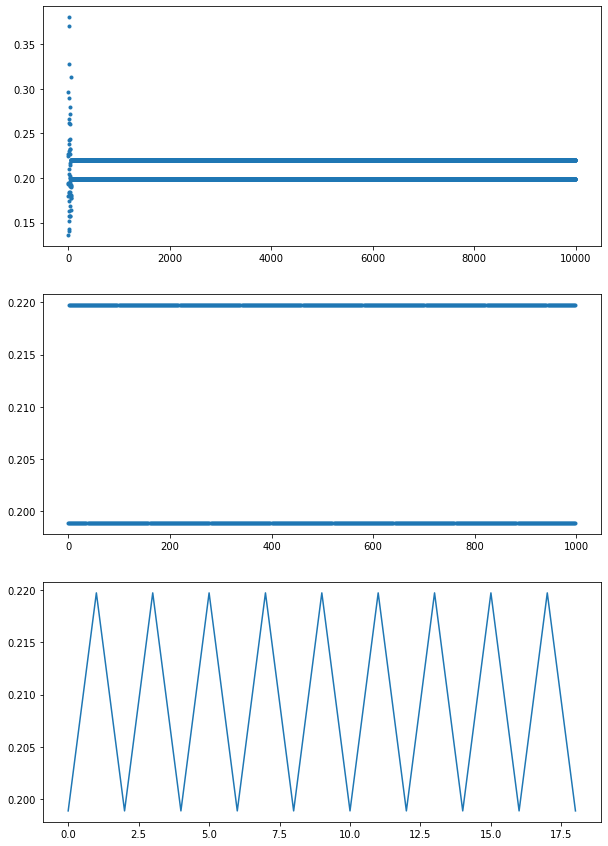

In [41]:
fig, ax = plt.subplots(nrows = 3, figsize = (10, 15))
ax[0].plot(tauar4, '.')
ax[1].plot(tauar4[9000:9999], '.')
ax[2].plot(tauar4[9980:9999])

ну как видно тау просто застревает между двумя уровнями, что в принципе ожидаемо

по всем видимости от нас еще хотят, чтобы мы посмотрели на сходимость как на модуль r и как на расстояние до настоящего решения (ну, нашей оценки) 

In [43]:
def upd_minres(A, b, solution, maxiter = 100, tol = 1e-15): 
    #модифицируем, чтобы получать вектора norm of residual deviation
    A = np.array(A)
    b = np.array(b)
    x = np.ones(n)
    count = 0
    res = []
    dev = []
    for i in range(maxiter):
        r = A@x - b
        ar = A@r
        tau = (r@ar)/np.linalg.norm(ar)**2
        x = x - tau*r
        count +=1
        res.append(np.linalg.norm(r))
        dev.append(np.linalg.norm(x - solution))
        if np.linalg.norm(A@x - b) < tol:
            break
        
    return x, np.array(res), np.array(dev)

All right
All right_2


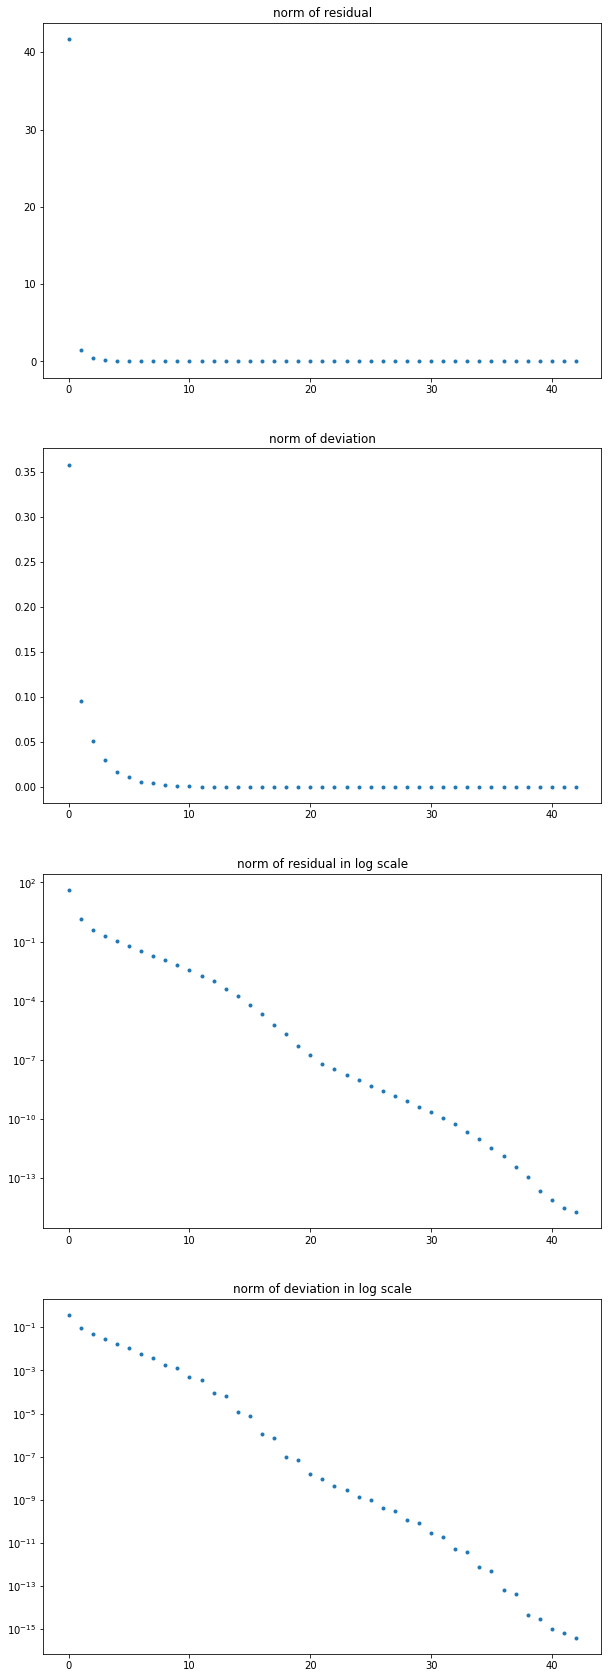

In [53]:
rndm = np.random.RandomState(9847022) #рандомно стучу по кравиатуре

n = 15
A = rndm.uniform(size=(n, n)) + np.diagflat([4]*n)
b = rndm.uniform(size=n)
x = siedel(A, b)[0]
if np.linalg.norm(A@x - b) < 1e-15:
    print('All right')
x2, res, dev = upd_minres(A, b, x)
if np.linalg.norm(A@x2 - b) < 1e-15:
    print('All right_2')
    
fig, ax = plt.subplots(nrows = 4, figsize = (10, 30))
ax[0].plot(res, '.')
ax[0].set_title('norm of residual')
ax[1].plot(dev, '.')
ax[1].set_title('norm of deviation')
ax[2].plot(res, '.')
ax[2].set_yscale('log')
ax[2].set_title('norm of residual in log scale')
ax[3].plot(dev, '.')
ax[3].set_title('norm of deviation in log scale')
ax[3].set_yscale('log')
plt.show()

Ну, в лог масштабе вроде чем-то похожее на прямую. Хорошо. Давайте попробуем еще что-нибудь, но намеренно заставим пройти 1000 итераций

All right
All right_2


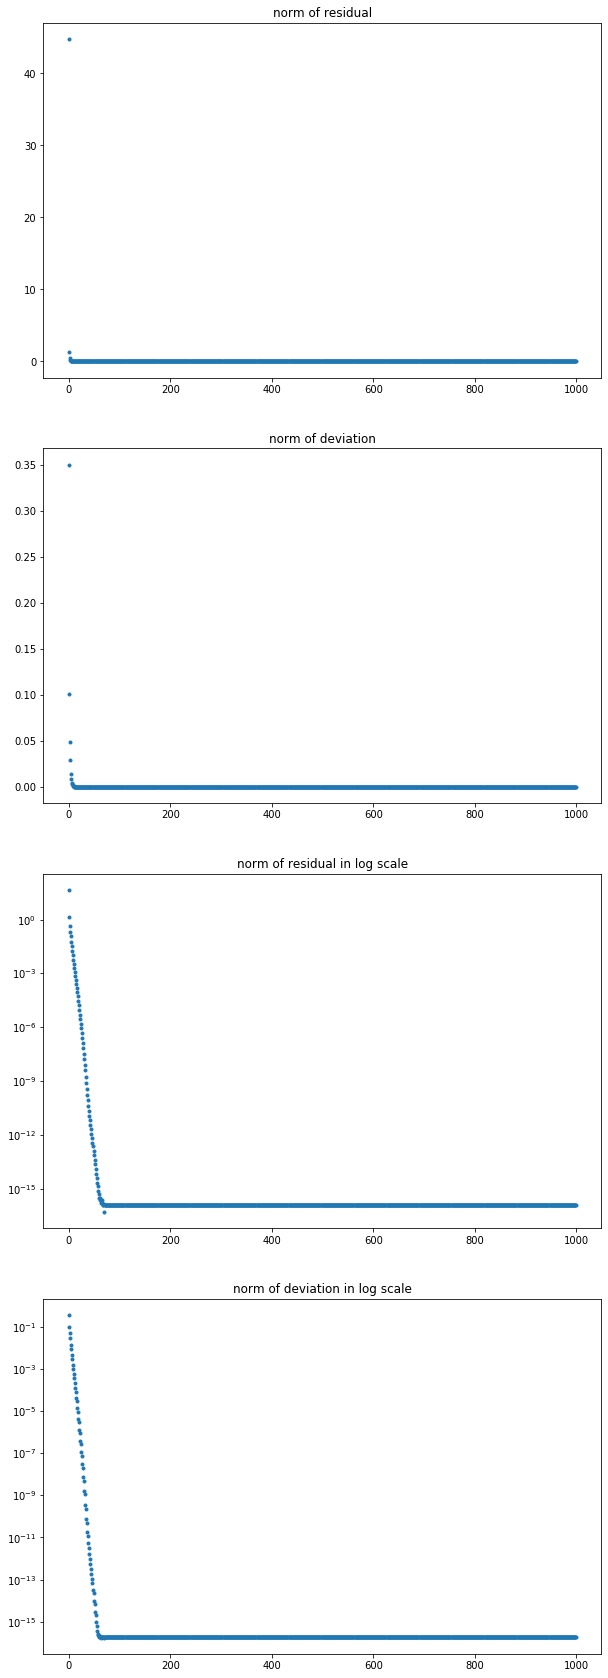

In [54]:
rndm = np.random.RandomState(17510292) #рандомно стучу по кравиатуре

n = 15
A = rndm.uniform(size=(n, n)) + np.diagflat([4]*n)
b = rndm.uniform(size=n)
x = siedel(A, b)[0]
if np.linalg.norm(A@x - b) < 1e-15:
    print('All right')
x2, res, dev = upd_minres(A, b, x, maxiter=1000, tol=1e-20) #нереальная точность (всмысле невозможная)
if np.linalg.norm(A@x2 - b) < 1e-15:
    print('All right_2')
    
fig, ax = plt.subplots(nrows = 4, figsize = (10, 30))
ax[0].plot(res, '.')
ax[0].set_title('norm of residual')
ax[1].plot(dev, '.')
ax[1].set_title('norm of deviation')
ax[2].plot(res, '.')
ax[2].set_yscale('log')
ax[2].set_title('norm of residual in log scale')
ax[3].plot(dev, '.')
ax[3].set_title('norm of deviation in log scale')
ax[3].set_yscale('log')
plt.show()

Ну как и следовало ожидать, экспотенциально падаем, пока не упремся в предел (где-то 1e-16), c на котором и будем сидеть. Есть подозрение, что 1е-16 это волшебная цифра для всем алгоритмов. 

Давайте сравнивать агоритмы что ли, иначе зачем мы столько написали?

In [69]:
rndm = np.random.RandomState(125329750) #рандомно стучу по кравиатуре

n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([4]*n)
b = rndm.uniform(size=n)

    
x1 = jac(A, b, tol= 1e-20)[0]
print(np.linalg.norm(A@x1 - b))
x2 = siedel(A, b, tol= 1e-20)[0]
print(np.linalg.norm(A@x2 - b))
x3 = minres(A, b, tol= 1e-20)[0]
print(np.linalg.norm(A@x3 - b))

6.72955034004679e-06
1.9675159943996247e-16
2.7755575615628914e-17


тут интересно кстати. Смотрите что будет, если не заставлять их гнаться по 1000 раз, а все же ограничить точность

In [70]:
rndm = np.random.RandomState(125329750) #рандомно стучу по кравиатуре

n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([4]*n)
b = rndm.uniform(size=n)

    
x1 = jac(A, b)[0]
print(np.linalg.norm(A@x1 - b))
x2 = siedel(A, b)[0]
print(np.linalg.norm(A@x2 - b))
x3 = minres(A, b,)[0]
print(np.linalg.norm(A@x3 - b))

6.72955034004679e-06
5.251601356122266e-16
7.088547964785382e-16


видите? видимо когда я ставил дефолтной точностью 1е-16 я был пессимист. Надо было смело ставить -18. Но исправлять я ничего не буду, как бы что не сломалось

In [82]:
rndm = np.random.RandomState(1587021) #рандомно стучу по кравиатуре

n = 15
A = rndm.uniform(size=(n, n)) + np.diagflat([4]*n)
b = rndm.uniform(size=n)

    
x1 = jac(A, b, tol= 1e-15)[0]
print(np.linalg.norm(A@x1 - b))
x2 = siedel(A, b, tol= 1e-20)[0]
print(np.linalg.norm(A@x2 - b))
x3 = minres(A, b, tol= 1e-16)[0]
print(np.linalg.norm(A@x3 - b))

inf
2.0955000055363631e-16
5.551115123125783e-17


почему-то minres плохеет на слишком большой точности. 

In [78]:
rndm = np.random.RandomState(125710) #рандомно стучу по кравиатуре

n = 10
A = rndm.uniform(size=(n, n)) + np.diagflat([6]*n)
b = rndm.uniform(size=n)

    
x1 = jac(A, b)[0]
print(np.linalg.norm(A@x1 - b))
x2 = siedel(A, b)[0]
print(np.linalg.norm(A@x2 - b))
x3 = minres(A, b)[0]
print(np.linalg.norm(A@x3 - b))

2.2887833992611187e-16
9.566618574882216e-16
9.38778750585887e-16


пока кажется, что Siedel получше будет, хотя вот minres иногда обгоняет. (меня не интересует скорость, так как даже на моем ноуте это всегда меньше секунды, проверяем только точность)  
Давайте проверим кто более устойчивый

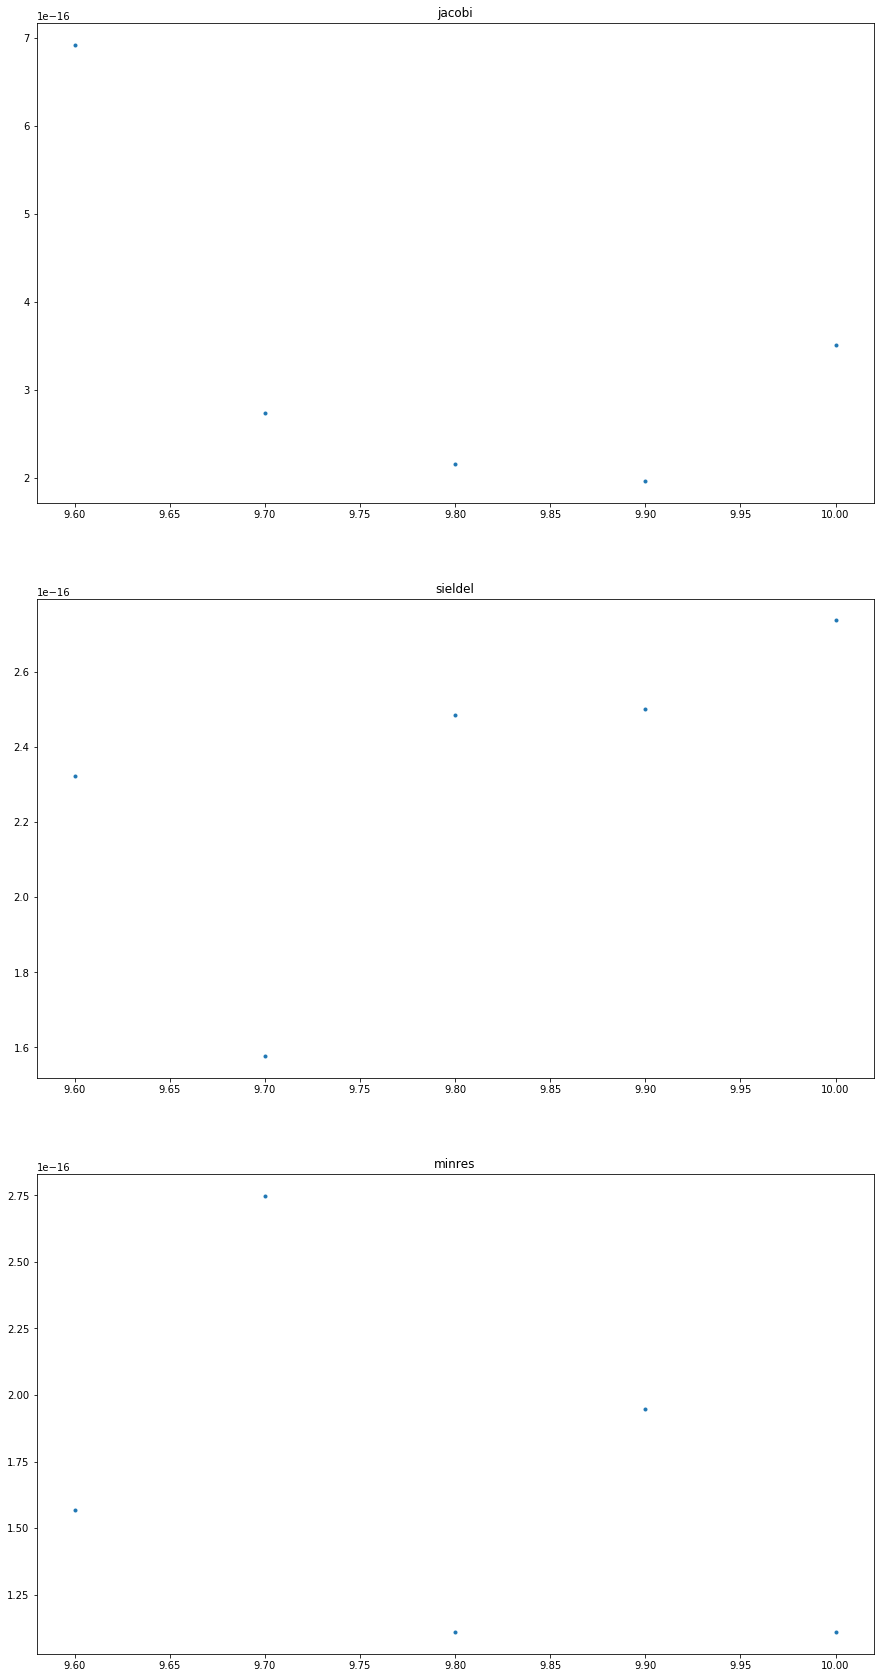

In [108]:
up, down = (10, 3)
j = []
s = []
m = []
for i in np.arange(up, down, -0.1):
    rndm = np.random.RandomState(36261246) #рандомно стучу по кравиатуре

    n = 15
    A = rndm.uniform(size=(n, n)) + np.diagflat([i]*n)
    b = rndm.uniform(size=n)

    
    x1 = jac(A, b, tol = 1e-17, maxiter = 100)[0] #точность выше 1е-17 все равно не возможна, а макситер ограничил
    #чтобы комп случайно не убить
    x2 = siedel(A, b, tol = 1e-17, maxiter = 100)[0]
    x3 = minres(A, b, tol = 1e-17, maxiter = 100)[0]
    if np.linalg.norm(A@x1 - b) < 1e-15:
        j.append(np.linalg.norm(A@x1 - b))
    else:
        j.append(np.nan)
    
    if np.linalg.norm(A@x1 - b) < 1e-15:
        s.append(np.linalg.norm(A@x2 - b))
    else:
        s.append(np.nan)
    
    if np.linalg.norm(A@x1 - b) < 1e-15:
        m.append(np.linalg.norm(A@x3 - b))
    else:
        m.append(np.nan)
    
fig, ax = plt.subplots(nrows= 3, figsize = (15, 30))
ax[0].plot(np.arange(up, down, -0.1), j, '.')
ax[0].set_title('jacobi')
# ax[0].set_yscale('log')
ax[1].plot(np.arange(up, down, -0.1), s, '.')
ax[1].set_title('sieldel')
# ax[1].set_yscale('log')
ax[2].plot(np.arange(up, down, -0.1), m, '.')
ax[2].set_title('minres')
# ax[2].set_yscale('log')
plt.show()

так, это странно, для n = 15 вообще никто не сошелся, даже когда параметр 9.5 Оказывается размерость играет роль, я не знал.  
Давайте вернемся на стандартные n = 10

А для n = 10 все сходится и почему-то не зависит от параметра,

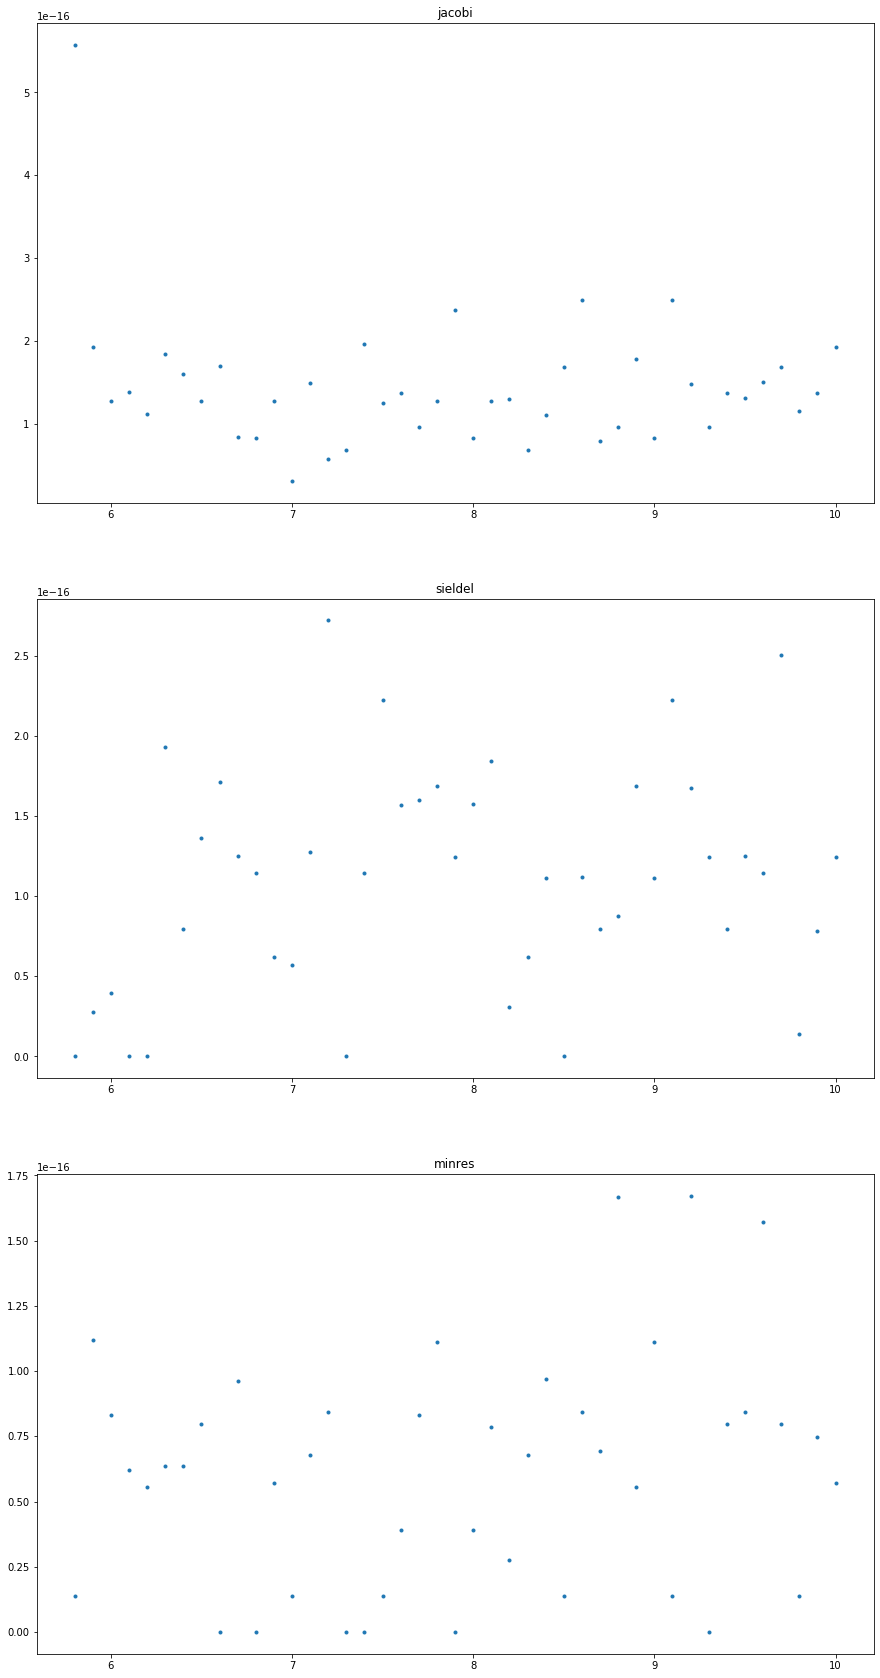

In [110]:
up, down = (10, 3)
j = []
s = []
m = []
for i in np.arange(up, down, -0.1):
    rndm = np.random.RandomState(36261246) #рандомно стучу по кравиатуре

    n = 10
    A = rndm.uniform(size=(n, n)) + np.diagflat([i]*n)
    b = rndm.uniform(size=n)

    
    x1 = jac(A, b, tol = 1e-17, maxiter = 100)[0] #точность выше 1е-17 все равно не возможна, а макситер ограничил
    #чтобы комп случайно не убить
    x2 = siedel(A, b, tol = 1e-17, maxiter = 100)[0]
    x3 = minres(A, b, tol = 1e-16, maxiter = 100)[0]
    if np.linalg.norm(A@x1 - b) < 1e-15:
        j.append(np.linalg.norm(A@x1 - b))
    else:
        j.append(np.nan)
    
    if np.linalg.norm(A@x1 - b) < 1e-15:
        s.append(np.linalg.norm(A@x2 - b))
    else:
        s.append(np.nan)
    
    if np.linalg.norm(A@x1 - b) < 1e-15:
        m.append(np.linalg.norm(A@x3 - b))
    else:
        m.append(np.nan)
    
fig, ax = plt.subplots(nrows= 3, figsize = (15, 30))
ax[0].plot(np.arange(up, down, -0.1), j, '.')
ax[0].set_title('jacobi')
# ax[0].set_yscale('log')
ax[1].plot(np.arange(up, down, -0.1), s, '.')
ax[1].set_title('sieldel')
# ax[1].set_yscale('log')
ax[2].plot(np.arange(up, down, -0.1), m, '.')
ax[2].set_title('minres')
# ax[2].set_yscale('log')
plt.show()

О, так мы дотянулись до параметра 6. minres почему-то плохеет когда я ставлю точность 1е-17. Поэтому я ей поставил 1е-16 и все заработало! Парадоксально. Видимо этой штуке почему-то противопоказаны лишние итерации, хотя раньше мы видели что алгоритм устойчив. Почему это так  я разбираться не буду, до дедлайна 1 час.  
Ну в общем все алгоритмы умирают примерно на одном и том же 